# This is a small script to show basic python stuff

In [22]:
# First always import packages

import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.stats import linregress

## Read in Data

for this use pd.readcsv

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html




In [27]:
# import temperature data
# import the other shit data

temp_data = pd.read_csv("ST070_AZ203_BT37_Temperature.csv", sep=",")
dew_data = pd.read_csv("ST070_AE207_BM03_DewPoint.csv", sep=",")

# format as time series data

temp_data["trigger_ts_utc"] = pd.to_datetime(temp_data["trigger_ts_utc"])
dew_data["trigger_ts_utc"] = pd.to_datetime(dew_data["trigger_ts_utc"])



In [28]:


# Compute the running average with a window size of 10

window_size = 5000
temp_data['running_avg'] = temp_data['measured_value'].rolling(window=window_size).mean()


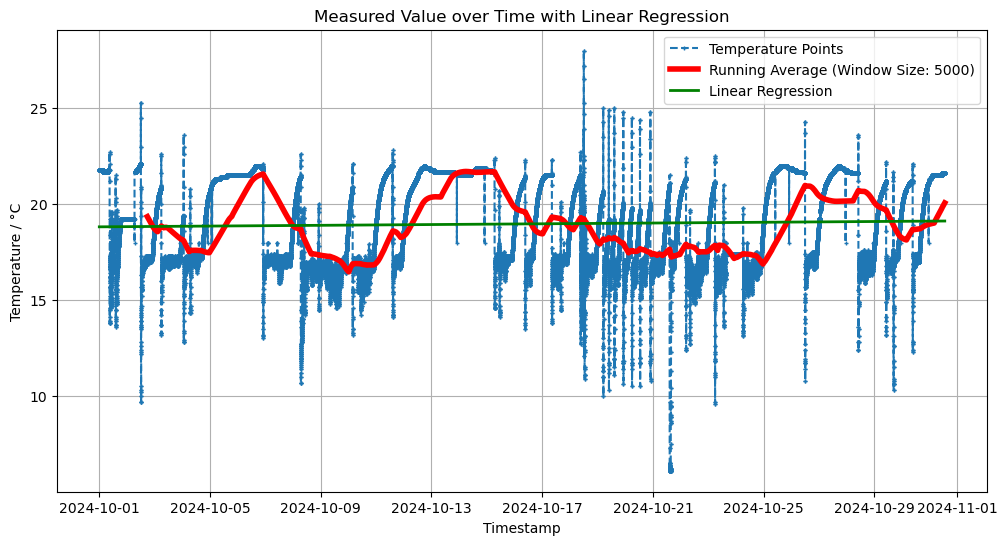

In [29]:


# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(temp_data['trigger_ts_utc'].astype(int), temp_data['measured_value'])

# Calculate regression line
temp_data['regression_line'] = intercept + slope * temp_data['trigger_ts_utc'].astype(int)

# Plot the data with the regression line
plt.figure(figsize=(12, 6))
plt.plot(temp_data['trigger_ts_utc'], temp_data['measured_value'], marker="+", markersize=3, linestyle="--", label="Temperature Points")
plt.plot(temp_data["trigger_ts_utc"], temp_data["running_avg"], label=f"Running Average (Window Size: {window_size})", color="red", linewidth=4)
plt.plot(temp_data['trigger_ts_utc'], temp_data['regression_line'], label="Linear Regression", color="green", linewidth=2)

plt.xlabel('Timestamp')
plt.ylabel('Temperature / °C')
plt.title('Measured Value over Time with Linear Regression')
plt.grid(True)
plt.legend()
plt.show()

In [30]:
window_size = 5000
dew_data['running_avg'] = dew_data['measured_value'].rolling(window=window_size).mean()

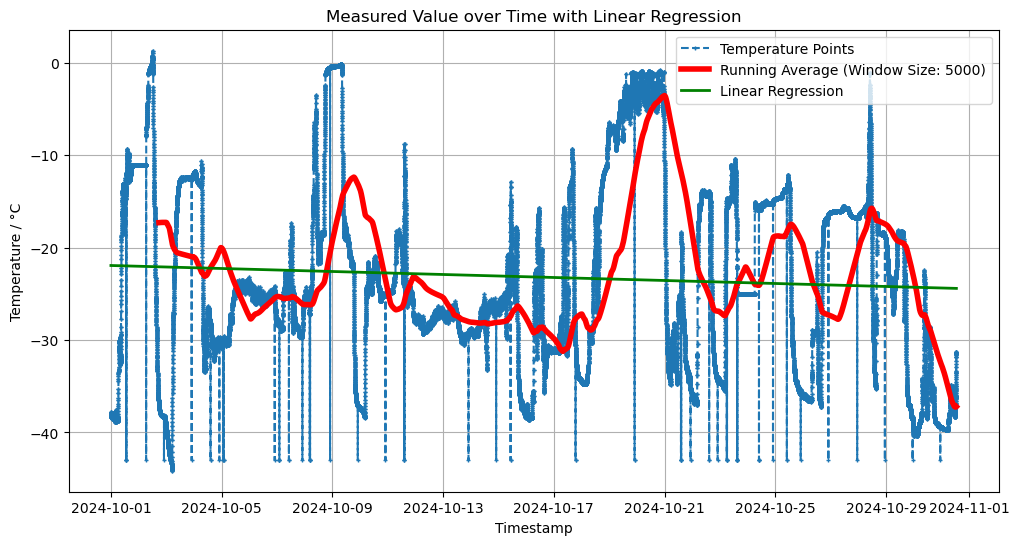

In [31]:
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(dew_data['trigger_ts_utc'].astype(int), dew_data['measured_value'])

# Calculate regression line
dew_data['regression_line'] = intercept + slope * dew_data['trigger_ts_utc'].astype(int)

# Plot the data with the regression line
plt.figure(figsize=(12, 6))
plt.plot(dew_data['trigger_ts_utc'], dew_data['measured_value'], marker="+", markersize=3, linestyle="--", label="Temperature Points")
plt.plot(dew_data["trigger_ts_utc"], dew_data["running_avg"], label=f"Running Average (Window Size: {window_size})", color="red", linewidth=4)
plt.plot(dew_data['trigger_ts_utc'], dew_data['regression_line'], label="Linear Regression", color="green", linewidth=2)

plt.xlabel('Timestamp')
plt.ylabel('Temperature / °C')
plt.title('Measured Value over Time with Linear Regression')
plt.grid(True)
plt.legend()
plt.show()

# Print weekend data against the workdays

In [60]:
temp_data["dayofweek"] = temp_data["trigger_ts_utc"].dt.dayofweek

workdays_temp = temp_data[temp_data["dayofweek"] <= 5]
weekend_temp = temp_data[temp_data["dayofweek"] >5]

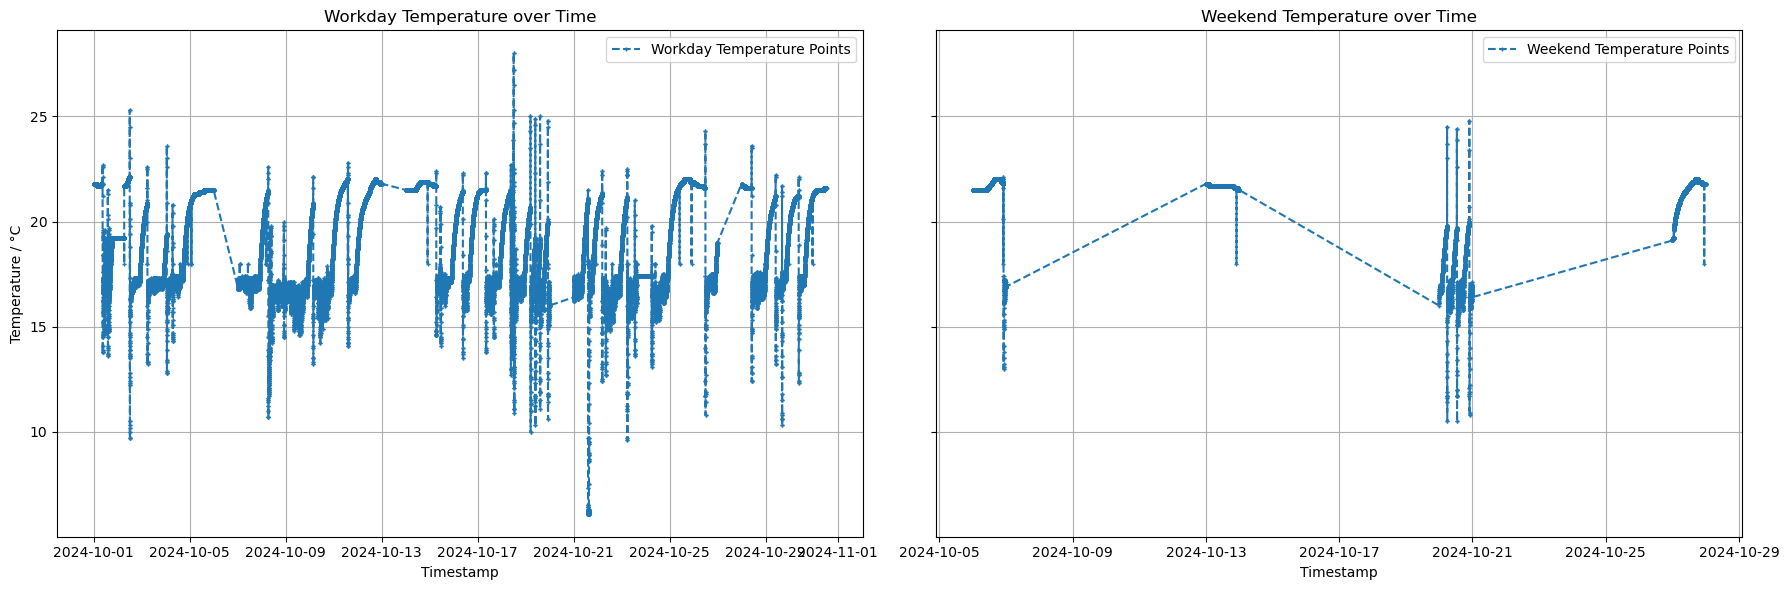

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6), sharey=True)

# Plot workday temperature
axes[0].plot(workdays_temp['trigger_ts_utc'], workdays_temp['measured_value'], marker="+", markersize=3, linestyle="--", label="Workday Temperature Points")
axes[0].set_title('Workday Temperature over Time')
axes[0].set_xlabel('Timestamp')
axes[0].set_ylabel('Temperature / °C')
axes[0].grid(True)
axes[0].legend()

# Plot weekend temperature
axes[1].plot(weekend_temp['trigger_ts_utc'], weekend_temp['measured_value'], marker="+", markersize=3, linestyle="--", label="Weekend Temperature Points")
axes[1].set_title('Weekend Temperature over Time')
axes[1].set_xlabel('Timestamp')
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

# Compare day against nighttime

In [62]:
# Entfernen der Hilfsspalte 'dayofweek'
workdays_temp = workdays_temp.drop(columns=['dayofweek'])

#  Index wird auf daytime gesetzt
workdays_temp.set_index('trigger_ts_utc', inplace=True)

In [68]:

daytime_temp = workdays_temp.between_time('06:00', '18:00')
nighttime_temp = workdays_temp.between_time("19:00", "05:00")


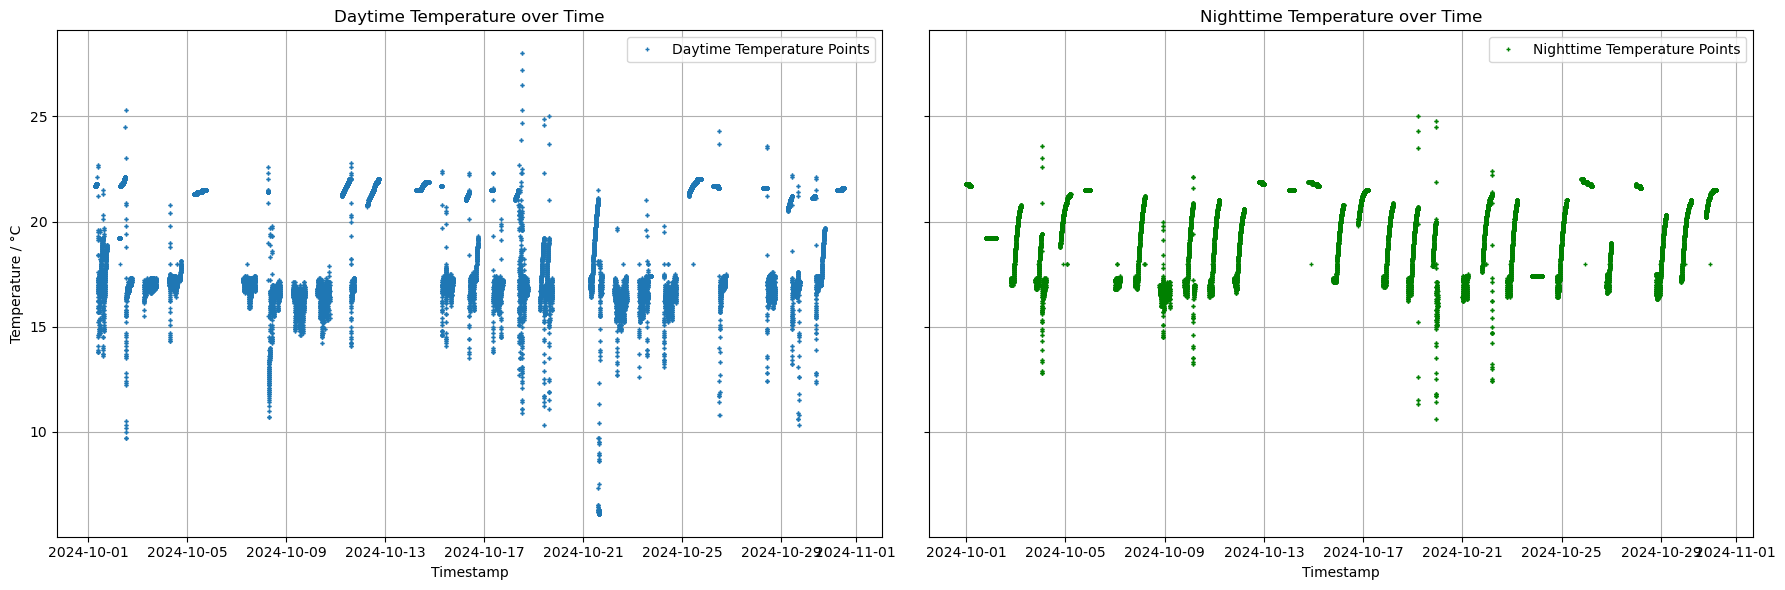

In [71]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6), sharey=True)

# Plot daytime temperature
axes[0].plot(daytime_temp.index, daytime_temp['measured_value'], marker="+", markersize=3, linestyle="", label="Daytime Temperature Points")
axes[0].set_title('Daytime Temperature over Time')
axes[0].set_xlabel('Timestamp')
axes[0].set_ylabel('Temperature / °C')
axes[0].grid(True)
axes[0].legend()

# Plot nighttime temperature
axes[1].plot(nighttime_temp.index, nighttime_temp['measured_value'], marker="+", markersize=3, linestyle="", label="Nighttime Temperature Points",color="green")
axes[1].set_title('Nighttime Temperature over Time')
axes[1].set_xlabel('Timestamp')
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()